In [1]:
import os
import pandas as pd

In [46]:
seed0 = "seed0"
seed42 = "seed42"
seed2023 = "seed2023"
score_path = "/home/jjonhwa/Emotion-Recognition-in-Conversation/data/score"

score_0 = [p for p in os.listdir(score_path) if seed0 in p]
score_42 = [p for p in os.listdir(score_path) if seed42 in p]
score_2023 = [p for p in os.listdir(score_path) if seed2023 in p]

In [89]:
data_macro_0 = pd.read_csv(os.path.join(score_path, score_0[0]))
data_micro_0 = pd.read_csv(os.path.join(score_path, score_0[1]))
data_weighted_0 = pd.read_csv(os.path.join(score_path, score_0[2]))

data_macro_42 = pd.read_csv(os.path.join(score_path, score_42[0]))
data_weighted_42 = pd.read_csv(os.path.join(score_path, score_42[1]))
data_micro_42 = pd.read_csv(os.path.join(score_path, score_42[2]))

data_micro_2023 = pd.read_csv(os.path.join(score_path, score_2023[0]))
data_weighted_2023 = pd.read_csv(os.path.join(score_path, score_2023[1]))
data_macro_2023 = pd.read_csv(os.path.join(score_path, score_2023[2]))

In [90]:
row = [29, 59, 89, 119, 149]

colname = [col for col in data_macro_0.columns if "score" in col and "MIN" not in col and "MAX" not in col]
data_macro_0 = data_macro_0[colname]
data_macro_0 = data_macro_0.iloc[row]
data_macro_0.columns = [(col.split(" - ")[0] + "-" + "_".join(col.split("_")[1:3])).replace("-small-", "-")  for col in data_macro_0.columns]

colname = [col for col in data_macro_42.columns if "score" in col and "MIN" not in col and "MAX" not in col]
data_macro_42 = data_macro_42[colname]
data_macro_42 = data_macro_42.iloc[row]
data_macro_42.columns = [(col.split(" - ")[0] + "-" + "_".join(col.split("_")[1:3])).replace("-small-", "-")  for col in data_macro_42.columns]

colname = [col for col in data_macro_2023.columns if "score" in col and "MIN" not in col and "MAX" not in col]
data_macro_2023 = data_macro_2023[colname]
data_macro_2023 = data_macro_2023.iloc[row]
data_macro_2023.columns = [(col.split(" - ")[0] + "-" + "_".join(col.split("_")[1:3])).replace("-small-", "-")  for col in data_macro_2023.columns]


colname = [col for col in data_micro_0.columns if "score" in col and "MIN" not in col and "MAX" not in col]
data_micro_0 = data_micro_0[colname]
data_micro_0 = data_micro_0.iloc[row]
data_micro_0.columns = [(col.split(" - ")[0] + "-" + "_".join(col.split("_")[1:3])).replace("-small-", "-")  for col in data_micro_0.columns]

colname = [col for col in data_micro_42.columns if "score" in col and "MIN" not in col and "MAX" not in col]
data_micro_42 = data_micro_42[colname]
data_micro_42 = data_micro_42.iloc[row]
data_micro_42.columns = [(col.split(" - ")[0] + "-" + "_".join(col.split("_")[1:3])).replace("-small-", "-")  for col in data_micro_42.columns]

colname = [col for col in data_micro_2023.columns if "score" in col and "MIN" not in col and "MAX" not in col]
data_micro_2023 = data_micro_2023[colname]
data_micro_2023 = data_micro_2023.iloc[row]
data_micro_2023.columns = [(col.split(" - ")[0] + "-" + "_".join(col.split("_")[1:3])).replace("-small-", "-")  for col in data_micro_2023.columns]


colname = [col for col in data_weighted_0.columns if "score" in col and "MIN" not in col and "MAX" not in col]
data_weighted_0 = data_weighted_0[colname]
data_weighted_0 = data_weighted_0.iloc[row]
data_weighted_0.columns = [(col.split(" - ")[0] + "-" + "_".join(col.split("_")[1:3])).replace("-small-", "-")  for col in data_weighted_0.columns]

colname = [col for col in data_weighted_42.columns if "score" in col and "MIN" not in col and "MAX" not in col]
data_weighted_42 = data_weighted_42[colname]
data_weighted_42 = data_weighted_42.iloc[row]
data_weighted_42.columns = [(col.split(" - ")[0] + "-" + "_".join(col.split("_")[1:3])).replace("-small-", "-")  for col in data_weighted_42.columns]

colname = [col for col in data_weighted_2023.columns if "score" in col and "MIN" not in col and "MAX" not in col]
data_weighted_2023 = data_weighted_2023[colname]
data_weighted_2023 = data_weighted_2023.iloc[row]
data_weighted_2023.columns = [(col.split(" - ")[0] + "-" + "_".join(col.split("_")[1:3])).replace("-small-", "-")  for col in data_weighted_2023.columns]

In [91]:
from matplotlib import pyplot as plt

In [92]:
data_macro = (data_macro_0 + data_macro_42 + data_macro_2023) / 3
data_micro = (data_micro_0 + data_micro_42 + data_micro_2023) / 3
data_weighted = (data_weighted_0 + data_weighted_42 + data_weighted_2023) / 3

In [93]:
data_macro['epoch'] = data_macro.index + 1
data_micro['epoch'] = data_micro.index + 1
data_weighted['epoch'] = data_weighted.index + 1

### 전체 비교

In [102]:
data_macro['epoch'][119]

120

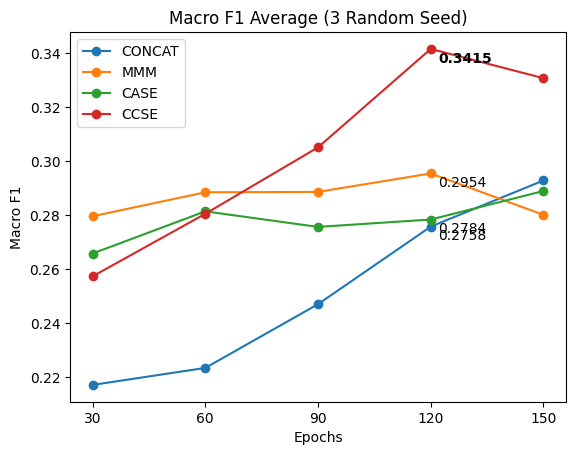

0.2758
0.2954
0.2784
0.3415


In [117]:
plt.plot(data_macro['epoch'], data_macro['Concat-macro_f1'], marker="o", label="CONCAT")
plt.plot(data_macro['epoch'], data_macro['MMM-macro_f1'], marker="o", label="MMM")
plt.plot(data_macro['epoch'], data_macro['CASE-macro_f1'], marker="o", label="CASE")
plt.plot(data_macro['epoch'], data_macro['CCSE-macro_f1'], marker="o", label="CCSE")

plt.title("Macro F1 Average (3 Random Seed)")
plt.xlabel("Epochs")
plt.ylabel("Macro F1")
plt.legend(loc = "upper left")
plt.xticks(data_macro['epoch'])

plt.text(data_macro['epoch'][119]+2, data_macro['Concat-macro_f1'][119] - 0.005, round(data_macro['Concat-macro_f1'][119], 4))
plt.text(data_macro['epoch'][119]+2, data_macro['MMM-macro_f1'][119] - 0.005, round(data_macro['MMM-macro_f1'][119], 4))
plt.text(data_macro['epoch'][119]+2, data_macro['CASE-macro_f1'][119] - 0.005, round(data_macro['CASE-macro_f1'][119], 4))
plt.text(data_macro['epoch'][119]+2, data_macro['CCSE-macro_f1'][119] - 0.005, round(data_macro['CCSE-macro_f1'][119], 4), weight="bold")
plt.show()

print(round(data_macro['Concat-macro_f1'][119], 4))
print(round(data_macro['MMM-macro_f1'][119], 4))
print(round(data_macro['CASE-macro_f1'][119], 4))
print(round(data_macro['CCSE-macro_f1'][119], 4))

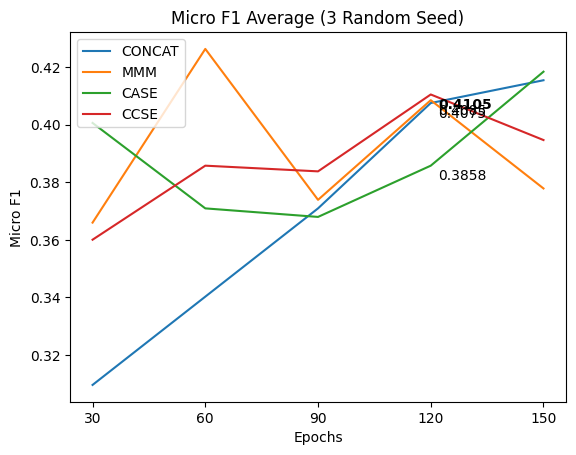

0.4075
0.4085
0.3858
0.4105


In [118]:
plt.plot(data_micro['epoch'], data_micro['Concat-micro_f1'], label="CONCAT")
plt.plot(data_micro['epoch'], data_micro['MMM-micro_f1'], label="MMM")
plt.plot(data_micro['epoch'], data_micro['CASE-micro_f1'], label="CASE")
plt.plot(data_micro['epoch'], data_micro['CCSE-micro_f1'], label="CCSE")

plt.title("Micro F1 Average (3 Random Seed)")
plt.xlabel("Epochs")
plt.ylabel("Micro F1")
plt.legend(loc = "upper left")
plt.xticks(data_micro['epoch'])

plt.text(data_micro['epoch'][119]+2, data_micro['Concat-micro_f1'][119] - 0.005, round(data_micro['Concat-micro_f1'][119], 4))
plt.text(data_micro['epoch'][119]+2, data_micro['MMM-micro_f1'][119] - 0.005, round(data_micro['MMM-micro_f1'][119], 4))
plt.text(data_micro['epoch'][119]+2, data_micro['CASE-micro_f1'][119] - 0.005, round(data_micro['CASE-micro_f1'][119], 4))
plt.text(data_micro['epoch'][119]+2, data_micro['CCSE-micro_f1'][119] - 0.005, round(data_micro['CCSE-micro_f1'][119], 4), weight="bold")
plt.show()

print(round(data_micro['Concat-micro_f1'][119], 4))
print(round(data_micro['MMM-micro_f1'][119], 4))
print(round(data_micro['CASE-micro_f1'][119], 4))
print(round(data_micro['CCSE-micro_f1'][119], 4))

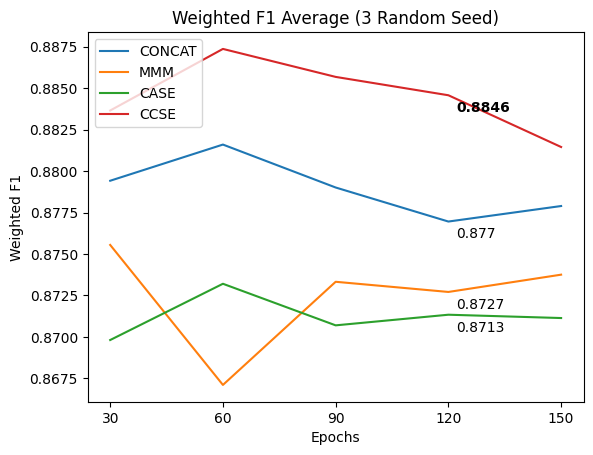

0.877
0.8727
0.8713
0.8846


In [120]:
plt.plot(data_weighted['epoch'], data_weighted['Concat-weighted_f1'], label="CONCAT")
plt.plot(data_weighted['epoch'], data_weighted['MMM-weighted_f1'], label="MMM")
plt.plot(data_weighted['epoch'], data_weighted['CASE-weighted_f1'], label="CASE")
plt.plot(data_weighted['epoch'], data_weighted['CCSE-weighted_f1'], label="CCSE")

plt.title("Weighted F1 Average (3 Random Seed)")
plt.xlabel("Epochs")
plt.ylabel("Weighted F1")
plt.legend(loc = "upper left")
plt.xticks(data_weighted['epoch'])

plt.text(data_weighted['epoch'][119]+2, data_weighted['Concat-weighted_f1'][119] - 0.001, round(data_weighted['Concat-weighted_f1'][119], 4))
plt.text(data_weighted['epoch'][119]+2, data_weighted['MMM-weighted_f1'][119] - 0.001, round(data_weighted['MMM-weighted_f1'][119], 4))
plt.text(data_weighted['epoch'][119]+2, data_weighted['CASE-weighted_f1'][119] - 0.001, round(data_weighted['CASE-weighted_f1'][119], 4))
plt.text(data_weighted['epoch'][119]+2, data_weighted['CCSE-weighted_f1'][119] - 0.001, round(data_weighted['CCSE-weighted_f1'][119], 4), weight="bold")
plt.show()

print(round(data_weighted['Concat-weighted_f1'][119], 4))
print(round(data_weighted['MMM-weighted_f1'][119], 4))
print(round(data_weighted['CASE-weighted_f1'][119], 4))
print(round(data_weighted['CCSE-weighted_f1'][119], 4))

### Add vs Concat

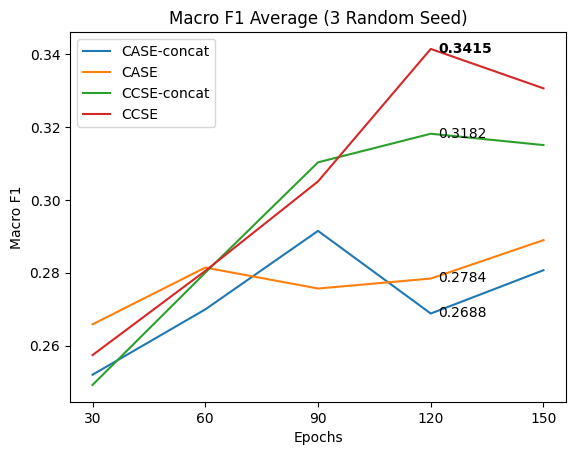

0.2688
0.2758
0.3182
0.3415


In [123]:
plt.plot(data_macro['epoch'], data_macro['CASE-concat-macro_f1'], label="CASE-concat")
plt.plot(data_macro['epoch'], data_macro['CASE-macro_f1'], label="CASE")
plt.plot(data_macro['epoch'], data_macro['CCSE-concat-macro_f1'], label="CCSE-concat")
plt.plot(data_macro['epoch'], data_macro['CCSE-macro_f1'], label="CCSE")

plt.title("Macro F1 Average (3 Random Seed)")
plt.xlabel("Epochs")
plt.ylabel("Macro F1")
plt.legend(loc = "upper left")
plt.xticks(data_macro['epoch'])

plt.text(data_macro['epoch'][119]+2, data_macro['CASE-concat-macro_f1'][119] - 0.001, round(data_macro['CASE-concat-macro_f1'][119], 4))
plt.text(data_macro['epoch'][119]+2, data_macro['CASE-macro_f1'][119] - 0.001, round(data_macro['CASE-macro_f1'][119], 4))
plt.text(data_macro['epoch'][119]+2, data_macro['CCSE-concat-macro_f1'][119] - 0.001, round(data_macro['CCSE-concat-macro_f1'][119], 4))
plt.text(data_macro['epoch'][119]+2, data_macro['CCSE-macro_f1'][119] - 0.001, round(data_macro['CCSE-macro_f1'][119], 4), weight="bold")
plt.show()

print(round(data_macro['CASE-concat-macro_f1'][119], 4))
print(round(data_macro['Concat-macro_f1'][119], 4))
print(round(data_macro['CCSE-concat-macro_f1'][119], 4))
print(round(data_macro['CCSE-macro_f1'][119], 4))


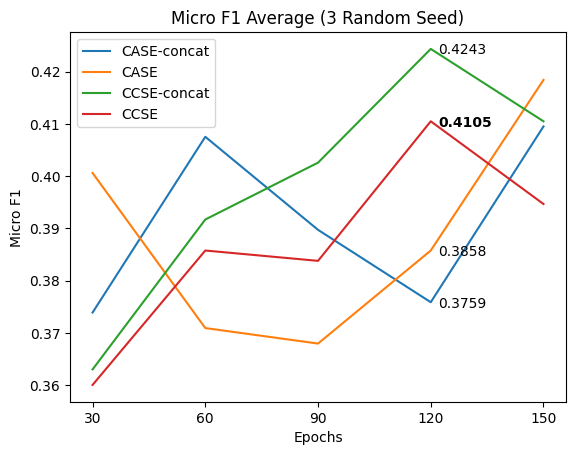

0.3759
0.4075
0.4243
0.4105


In [124]:
plt.plot(data_micro['epoch'], data_micro['CASE-concat-micro_f1'], label="CASE-concat")
plt.plot(data_micro['epoch'], data_micro['CASE-micro_f1'], label="CASE")
plt.plot(data_micro['epoch'], data_micro['CCSE-concat-micro_f1'], label="CCSE-concat")
plt.plot(data_micro['epoch'], data_micro['CCSE-micro_f1'], label="CCSE")

plt.title("Micro F1 Average (3 Random Seed)")
plt.xlabel("Epochs")
plt.ylabel("Micro F1")
plt.legend(loc = "upper left")
plt.xticks(data_micro['epoch'])

plt.text(data_micro['epoch'][119]+2, data_micro['CASE-concat-micro_f1'][119] - 0.001, round(data_micro['CASE-concat-micro_f1'][119], 4))
plt.text(data_micro['epoch'][119]+2, data_micro['CASE-micro_f1'][119] - 0.001, round(data_micro['CASE-micro_f1'][119], 4))
plt.text(data_micro['epoch'][119]+2, data_micro['CCSE-concat-micro_f1'][119] - 0.001, round(data_micro['CCSE-concat-micro_f1'][119], 4))
plt.text(data_micro['epoch'][119]+2, data_micro['CCSE-micro_f1'][119] - 0.001, round(data_micro['CCSE-micro_f1'][119], 4), weight="bold")
plt.show()

print(round(data_micro['CASE-concat-micro_f1'][119], 4))
print(round(data_micro['Concat-micro_f1'][119], 4))
print(round(data_micro['CCSE-concat-micro_f1'][119], 4))
print(round(data_micro['CCSE-micro_f1'][119], 4))


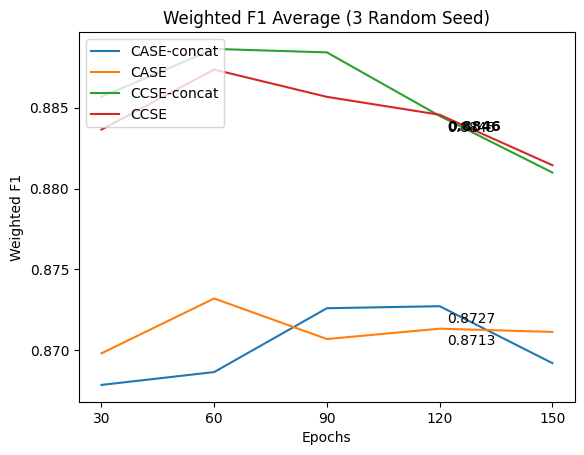

0.8727
0.877
0.8845
0.8846


In [125]:
plt.plot(data_weighted['epoch'], data_weighted['CASE-concat-weighted_f1'], label="CASE-concat")
plt.plot(data_weighted['epoch'], data_weighted['CASE-weighted_f1'], label="CASE")
plt.plot(data_weighted['epoch'], data_weighted['CCSE-concat-weighted_f1'], label="CCSE-concat")
plt.plot(data_weighted['epoch'], data_weighted['CCSE-weighted_f1'], label="CCSE")

plt.title("Weighted F1 Average (3 Random Seed)")
plt.xlabel("Epochs")
plt.ylabel("Weighted F1")
plt.legend(loc = "upper left")
plt.xticks(data_weighted['epoch'])

plt.text(data_weighted['epoch'][119]+2, data_weighted['CASE-concat-weighted_f1'][119] - 0.001, round(data_weighted['CASE-concat-weighted_f1'][119], 4))
plt.text(data_weighted['epoch'][119]+2, data_weighted['CASE-weighted_f1'][119] - 0.001, round(data_weighted['CASE-weighted_f1'][119], 4))
plt.text(data_weighted['epoch'][119]+2, data_weighted['CCSE-concat-weighted_f1'][119] - 0.001, round(data_weighted['CCSE-concat-weighted_f1'][119], 4))
plt.text(data_weighted['epoch'][119]+2, data_weighted['CCSE-weighted_f1'][119] - 0.001, round(data_weighted['CCSE-weighted_f1'][119], 4), weight="bold")
plt.show()

print(round(data_weighted['CASE-concat-weighted_f1'][119], 4))
print(round(data_weighted['Concat-weighted_f1'][119], 4))
print(round(data_weighted['CCSE-concat-weighted_f1'][119], 4))
print(round(data_weighted['CCSE-weighted_f1'][119], 4))